# Create an interactive map of Baltimore Crime Data



Download and prepare data for use in project
We want to download the table of arrest data, and remove rows without a location

In [1]:
!pip install folium
import folium
import requests
import pandas as pd

import matplotlib.pyplot as plt

You are using pip version 9.0.3, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
# download the data into a pandas dataframe
arrest_table = pd.read_csv("http://www.hcbravo.org/IntroDataSci/misc/BPD_Arrests.csv")

# remove rows with null location
arrest_table = arrest_table[pd.notnull(arrest_table["Location 1"])]

# parse the location column into lat and long
arrest_table["lat"], arrest_table["long"] = arrest_table["Location 1"].str.split(",").str
arrest_table["lat"] = arrest_table["lat"].str.replace("(", "").astype(float)
arrest_table["long"] = arrest_table["long"].str.replace(")", "").astype(float)
arrest_table = arrest_table.drop('Location 1', axis=1)

# let's see the table
print(arrest_table.shape)
#arrest_table

# create a blank map
map_osm = folium.Map(location=[39.29, -76.61], zoom_start=12)

(63892, 16)


For more on this and other datasets, see:
- https://data.baltimorecity.gov/Public-Safety/BPD-Arrests/3i3v-ibrt
- https://data.baltimorecity.gov/Public-Safety/Color-Coded-Crime-Map/xugk-a6qb
- http://legacydirs.umiacs.umd.edu/~hcorrada/CFG/lectures/lect20_Rintro/baltimore.html
- http://fusionanalyticsworld.com/eda-case-study-baltimore-police-department-arrest-data/
- https://plot.ly/ipython-notebooks/baltimore-vital-signs/
- http://www.racketracer.com/2015/03/02/predicting-and-plotting-crime-in-seattle/
- https://minimaxir.com/2015/12/sf-arrest-maps/

In [3]:
# see how many empty cells there are
for column in arrest_table.columns:
    print(column, arrest_table[column].isnull().sum())

arrest 1948
age 0
race 1
sex 1
arrestDate 0
arrestTime 0
arrestLocation 0
incidentOffense 0
incidentLocation 3782
charge 6611
chargeDescription 2560
district 91
post 91
neighborhood 91
lat 0
long 0


In [4]:
# let's drop all null values for columns we will care about later
arrest_table.dropna(subset=['age', 'race', 'sex', 'charge', 'chargeDescription'], inplace=True)

# let's create a smaller dataset, just while we're testing
#arrest_table_sm = arrest_table.loc[0:1000]
arrest_table_sm = arrest_table.sample(500)
#print(arrest_table_sm.dtypes)
arrest_table_sm

,arrest,age,race,sex,arrestDate,arrestTime,arrestLocation,incidentOffense,incidentLocation,charge,chargeDescription,district,post,neighborhood,lat,long
46746,11368434.0,29,B,M,11/14/2011,13:55:00,2300 Ashton St,87-Narcotics,500 S Monroe St,4 3550,Cds:Possess-Not Marihuana || Cds,SOUTHWESTERN,835.0,Millhill,39.281448,-76.652613
98187,12583493.0,35,W,M,11/07/2012,01:00:00,5200 Belair Rd,115-Trespassing,5100 Belair Rd,1 0521,Theft Less Than $100.00 || Trespassing,NORTHEASTERN,427.0,Frankford,39.337003,-76.553212
75581,12491173.0,31,B,M,06/05/2012,10:30:00,3400 W Caton Ave,97-Search & Seizure,3400 W Caton Av,1 1314,Mach Gun Aggressive Purpose || Weapons Violation,SOUTHWESTERN,816.0,Saint Josephs,39.286721,-76.674238
37637,11321329.0,43,B,M,09/14/2011,18:45:00,600 N Carey St,87O-Narcotics (Outside),600 N Carey St,5 3550,Cds:Poss Para || Cds: Poss-Cocaine,WESTERN,713.0,Harlem Park,39.295546,-76.638549
25496,11252410.0,59,B,F,06/24/2011,15:30:00,1300 Gilmor St,87O-Narcotics (Outside),1500 Presser Ct,4 3550,Cds:Possess-Not Marihuana || Cds Violation,WESTERN,731.0,Sandtown-Winchester,39.303289,-76.643238
77605,12498713.0,40,B,M,06/18/2012,16:05:00,4200 Moravia Rd,87-Narcotics,4600 Belair Rd,5 3550,Cds:Poss Para || Cds,NORTHEASTERN,436.0,Frankford,39.331053,-76.561416
79022,12504605.0,49,B,F,06/27/2012,18:50:00,2000 N Bentalou St,97-Search & Seizure,2000 N Bentalou St,1 0573,Cds: Possession-Marihuana || Cds Violation,WESTERN,735.0,Mondawmin,39.310813,-76.654213
52393,11394068.0,48,B,M,12/28/2011,10:50:00,300 W Saratoga St,87-Narcotics,300 W Saratoga St,4 3550,Cds:Possess-Not Marihuana || Cds,CENTRAL,121.0,Downtown,39.292914,-76.619754
58023,12418478.0,58,B,M,02/07/2012,10:25:00,1300 Carey St,87-Narcotics,1300 N Carey St,4 3550,Cds:Possess-Not Marihuana || Dist Cocaine,WESTERN,731.0,Sandtown-Winchester,39.303421,-76.638996
63704,12441779.0,52,B,F,03/16/2012,00:24:00,500 N Rose St,4C-Agg. Asslt.- Oth.,500 N Rose St,1 5200,Deadly Weapon-Int/Injure || Assault,SOUTHEASTERN,221.0,McElderry Park,39.297098,-76.581514



## Plotting the arrest data

We will plot either a circle/triangle for female/male, and plot using colors to represent race:


| icon | sex |
| --- | --- |
| Circle | Female | 
| Triangle | Male | 

| icon color | race | 
| --- | --- |
| orange | A |
| black | B |
| blue | I |
| pink | U |
| red | W |




In [5]:
# plot the arrest data

# set the colors for race: A,B,I,U,W
colors = {'A' : 'orange', 'B' : 'black', 'I' : 'blue', 'U' : 'pink', 'W' : 'red'}

# add a popup with more details on the crime

for index, row in arrest_table_sm.loc[arrest_table_sm['sex'] == 'F'].iterrows():
    #popup_str = 'Charge Description: "' + str(row['chargeDescription']) + '" ' + 
    folium.CircleMarker(location=[row["lat"], row["long"]], 
                                   radius=5, 
                                   color=colors[row['race']],
                                   popup=str(row['chargeDescription']),
                                   fill_opacity=0).add_to(map_osm)

arrest_table_sm.loc[arrest_table_sm['sex'] == 'M'].apply(
    lambda row:folium.RegularPolygonMarker(
                            location=[row["lat"], row["long"]], 
                            radius=5, 
                            number_of_sides=3, 
                            color=colors[row['race']],
                            popup=str(row['chargeDescription']),
                            fill_opacity=0)
                      .add_to(map_osm), axis=1)

map_osm


We see that there are relatively few (down to zero) arrests in some neighborhoods, such as Federal Hill, Canton, and the Inner Harbor.

Some roads stick out in the map with particularly high arrest rates: Druid Hill Ave and Belair Road, for example.

The map also makes apparent where there are a higher concentrations of arrests of certain races.  For example, there appears to be a higher portion of white female arrests in the area to the east of Patterson Park.

It would be interesting to overlay this plot with census data, to see household income versus arrests in a neighborhood.

It would be also be interesting if I had broken down the crime by types and plotted that.  For example, to plot violent cime (assaults, etc), or drug possession, or prostitution.

I originally had grand plans of making this a time series, to be able to see the arrest data by year (and compare to years with a new mayor, or years with crime initiatives, or years of new police chiefs) or to see the arrest data by month (to compare summer arrest activity to winter arrest activity).

I believe it's important to point out that this map doesn't necessarily say where there is more crime, but merely where there are more arrests.  There could be biases present in this data, for example, if police were more likely to arrest people in a certain neighborhood for the same activity that could be present in another neighborhood.



## Let's see the breakdown of the reasons for each arrest

The Charge database at the Maryland Courts website has information about each charge code
https://mdcourts.gov/district/chargedb

(it would be better to save the xml file from the website, then to get the charge codes into a data frame, in order to match them to a description)


In [6]:
# first store the total number of arrest charges in our data frame
arrests_by_charge_1 = arrest_table_sm.groupby('charge').size().sort_values(ascending=False)
arrests_by_charge_df_1 = pd.DataFrame(arrests_by_charge_1, columns=['Number of Arrests'])
total_arrest_by_charge = arrests_by_charge_df_1.sum()

In [7]:
# let's see the most common reasons for arrests
arrest_table_sm.groupby('charge').size().sort_values(ascending=False)
#arrest_table_sm.groupby('charge').size().sort_values(ascending=False).head(8)

# ugly hard coding of charge codes that were in top 
charge_codes = [ ['4 3550','CDS: POSSESSION-NOT MARIJUANA'],
                 ['1 0573','CDS: POSSESSION-MARIJUANA'],
                 ['1 1415','ASSAULT-SEC DEGREE'],
                 ['5 3550','CDS: POSSESSION PARAPHERNALIA'],
                 ['2 2210','TRESPASS: POSTED PROPERTY'],
                 ['1 5200','DEADLY WEAPON: WEAR AND CARRY WITH INTENT TO INJURE'],
                 ['1 0521','THEFT LESS THAN $100'],
                 ['1 1093','PROSTITUTION-GENERAL'],
                 ['2 0050','DISORDERLY CONDUCT'],
                 ['2 3030','BURGLARY-FOURTH DEGREE'],
                 ['3 4025','MALICIOUS DESTRUCTION OF PROPERTY/VALUE LESS THAN $500']
               ]
charge_codes_df = pd.DataFrame(charge_codes,columns=['Charge Code','Charge Description'])
charge_codes_df = charge_codes_df.set_index('Charge Code')

arrests_by_charge = arrest_table_sm.groupby('charge').size().sort_values(ascending=False).head(10)
#type(arrests_by_charge)
#arrests_by_charge.index
arrests_by_charge_df = pd.DataFrame(arrests_by_charge,columns=['Number of Arrests'])

# merge the charge code dataframe with the dataframe listed how many arrests per charge code
arrests_by_charge_df = arrests_by_charge_df.merge(charge_codes_df, left_index=True, right_index=True, how='inner')
arrests_by_charge_df

sum_head_arrests = arrests_by_charge.sum()
leftover_num_arrests = total_arrest_by_charge - sum_head_arrests
leftover_num_arrests = leftover_num_arrests['Number of Arrests']
print(leftover_num_arrests)

#arrests_by_charge_df.at['0 0000', 'Number of Arrests'] = letover_num_arrests

#arrests_by_charge_df = arrests_by_charge_df.append({'0 0000' : leftover_num_arrests}, ignore_index=True)
arrests_by_charge_df.loc['0 0000'] = [leftover_num_arrests, 'OTHER'] 

arrests_by_charge_df.sort_values(by=['Number of Arrests'], ascending=False, inplace=True)
arrests_by_charge_df

116


,Number of Arrests,Charge Description
4 3550,136,CDS: POSSESSION-NOT MARIJUANA
0 0000,116,OTHER
1 0573,110,CDS: POSSESSION-MARIJUANA
1 1415,38,ASSAULT-SEC DEGREE
5 3550,23,CDS: POSSESSION PARAPHERNALIA
2 2210,18,TRESPASS: POSTED PROPERTY
1 1093,15,PROSTITUTION-GENERAL
2 3030,14,BURGLARY-FOURTH DEGREE
1 0521,11,THEFT LESS THAN $100


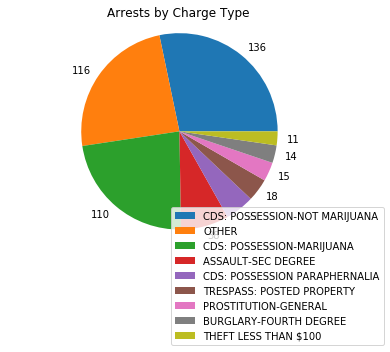

In [8]:
# Data to plot
labels = arrests_by_charge_df.index
sizes = arrests_by_charge_df['Number of Arrests']
 
# Plot
plt.title('Arrests by Charge Type')
plt.pie(sizes, labels=sizes)
#plt.legend(arrests_by_charge_df['Charge Description'], loc=10)

plt.legend(arrests_by_charge_df['Charge Description'], bbox_to_anchor=(1,0), loc="right", fontsize=10, 
           bbox_transform=plt.gcf().transFigure)

plt.axis('equal')
plt.show()
  
# I should get all the charge code descriptions from the XML file, and
# match them to the arrests data to be comprehensive.  
# That would also predict against new charge codes appearing in the top 10 from different times 
# sampling the full data set.




The "OTHER" field holds each arrest that was not one of the 10 most common charge descriptions.

We can see that the most common arrest reasons are for possession of "controlled dangerous substanses".  